In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn import linear_model
#import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
#from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [2]:
bankoriginal = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bankoriginal.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
bankoriginal.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
bankoriginal.shape

(5000, 14)

In [6]:
bankoriginal.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [7]:
#Number of unique in each column? 
bankoriginal.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
for col in bankoriginal:
    print(col)
    print(np.sort(bankoriginal[col].unique()))

ID
[   1    2    3 ... 4998 4999 5000]
Age
[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
Experience
[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Income
[  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 185
 188 189 190 191 192 193 194 195 198 199 200 201 202 203 204 205 218 224]

In [9]:
##Incorrect Imoutation? (replace negative values in Experience column with same value but positive)
bank=bankoriginal.copy()
bank[bank < 0] = bank*(-1)

In [10]:
#Number of people with zero mortgage? 
Mortgage = bank.apply(lambda x: True if x['Mortgage'] == 0 else False , axis=1)
Mortgage0count = len(Mortgage[Mortgage == True].index)
Mortgage0count

3462

In [11]:
#Number of people with zero credit card spending per month? 
CCAvg = bank.apply(lambda x: True if x['CCAvg'] == 0 else False , axis=1)
CCAvg0count = len(CCAvg[CCAvg == True].index)
CCAvg0count

106

In [12]:
#Value counts of all categorical columns. 
bank[['Family']].apply(pd.Series.value_counts)

,Family
1,1472
2,1296
4,1222
3,1010


In [13]:
#Value counts of all categorical columns. 
bank[['Education']].apply(pd.Series.value_counts)

,Education
1,2096
3,1501
2,1403


In [14]:
#Value counts of all categorical columns. 
bank[['Personal Loan']].apply(pd.Series.value_counts)

,Personal Loan
0,4520
1,480


In [15]:
#Value counts of all categorical columns. 
bank[['Securities Account']].apply(pd.Series.value_counts)

,Securities Account
0,4478
1,522


In [16]:
#Value counts of all categorical columns. 
bank[['CD Account']].apply(pd.Series.value_counts)

,CD Account
0,4698
1,302


In [17]:
#Value counts of all categorical columns. 
bank[['Online']].apply(pd.Series.value_counts)

,Online
1,2984
0,2016


In [18]:
#Value counts of all categorical columns. 
bank[['CreditCard']].apply(pd.Series.value_counts)

,CreditCard
0,3530
1,1470


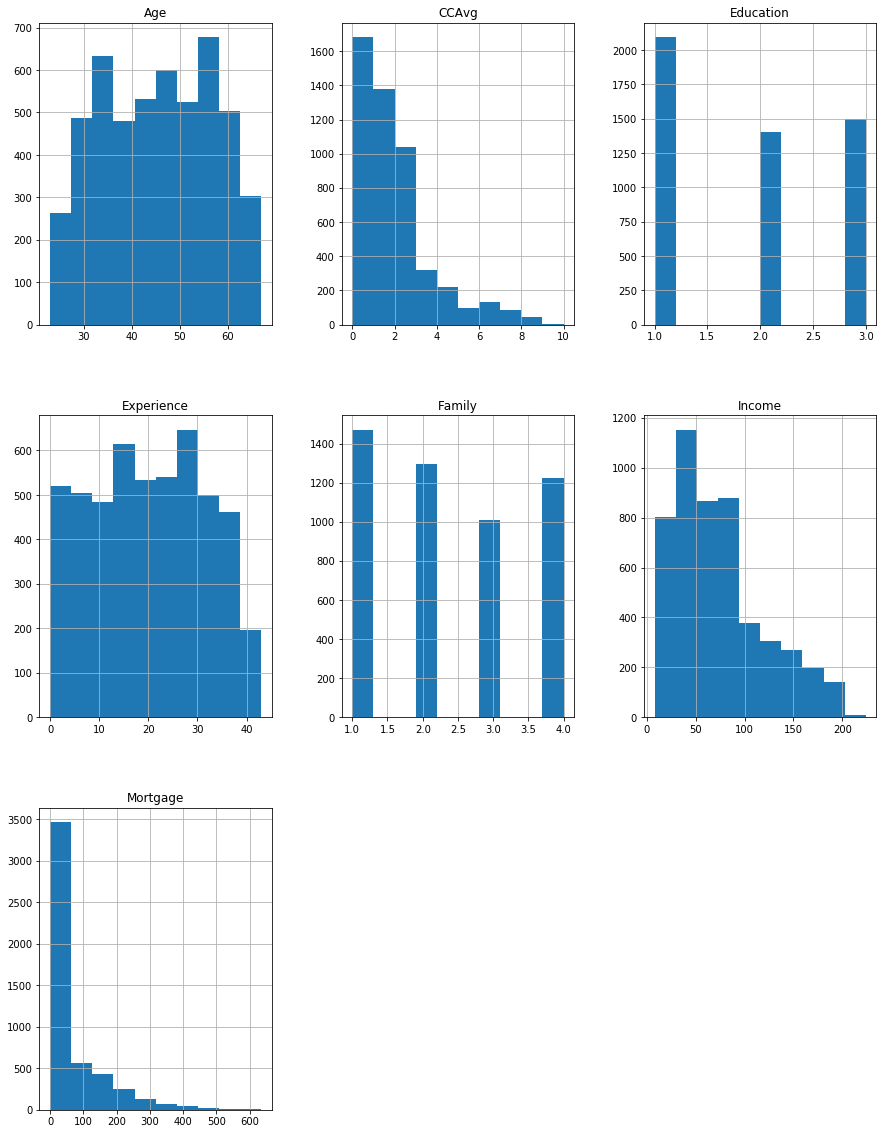

In [19]:
#data distribution
hist = bank.hist(figsize = (15,20), column=['Age','Experience','Income','Family','CCAvg','Education','Mortgage'])

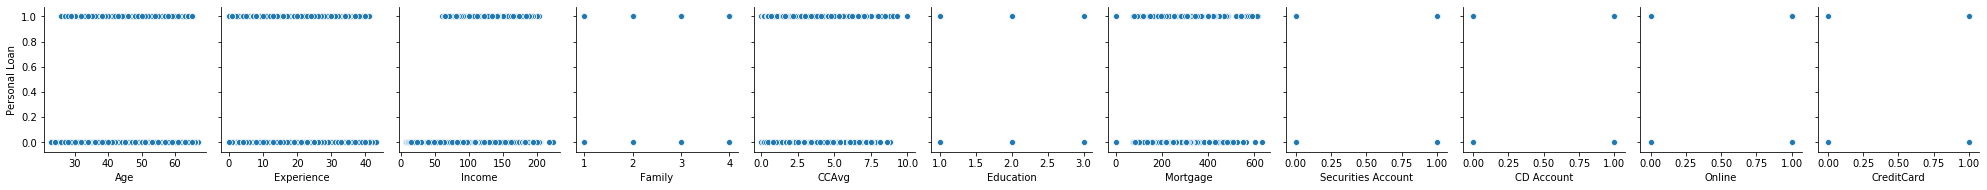

In [20]:
#Multivariate analysis
bank_attr = bank.iloc[:, 1:14]
sns.pairplot(bank_attr, y_vars=["Personal Loan"],
                 x_vars=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])

In [21]:
bank_attr.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


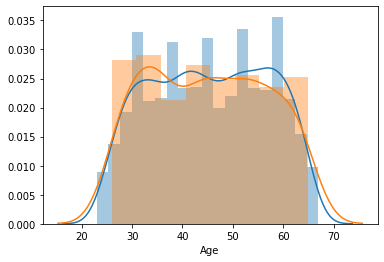

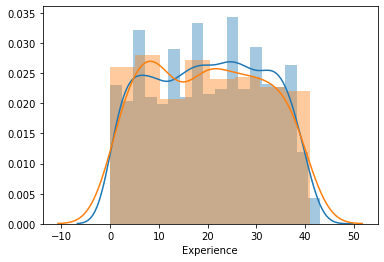

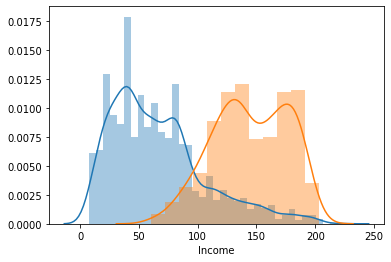

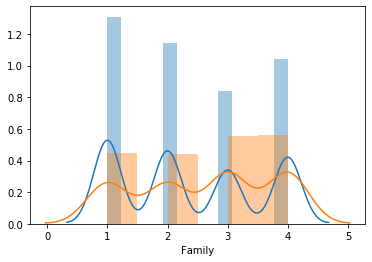

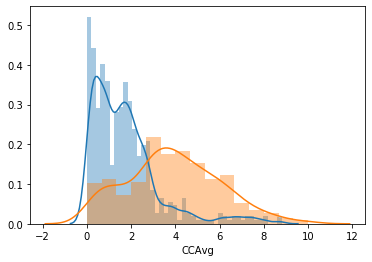

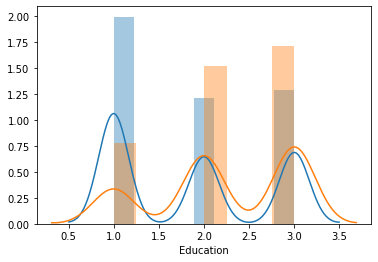

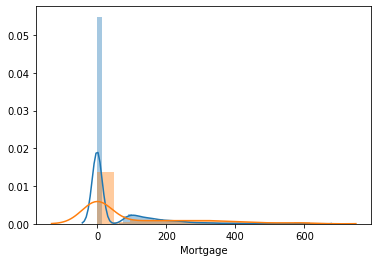

In [22]:
xaxis=['Age','Experience','Income','Family','CCAvg','Education','Mortgage']
for i in xaxis:
    plt.figure(i)
    sns.distplot(bank_attr[bank_attr['Personal Loan'] == 0][i])
    sns.distplot(bank_attr[bank_attr['Personal Loan'] == 1][i])

In [23]:
#preparing model and splitting data
bank['Education'] = bank['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})
bank = pd.get_dummies(bank, columns=['Education'])
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced,Education_Graduate,Education_Undergrad
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


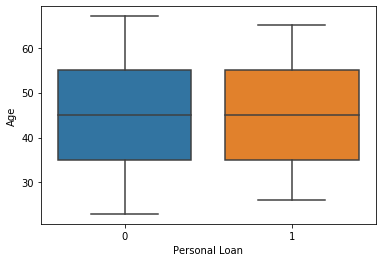

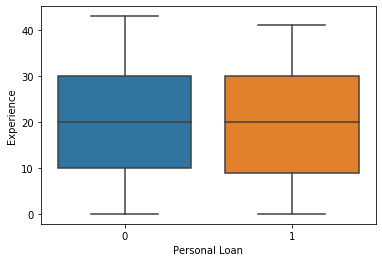

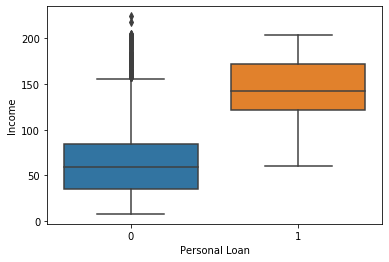

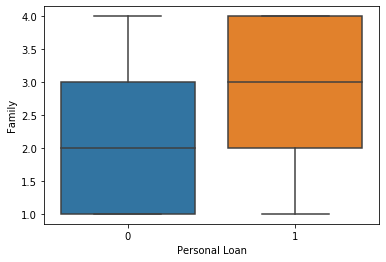

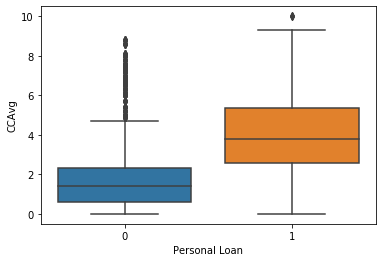

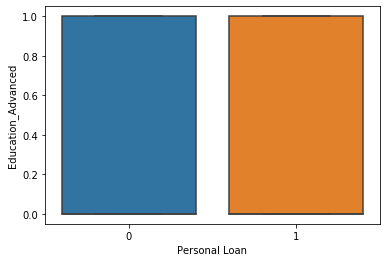

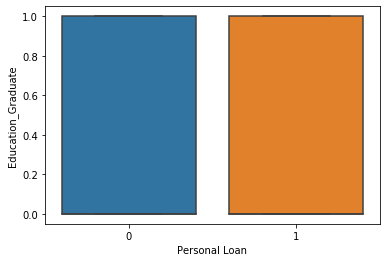

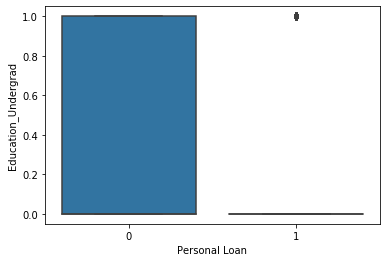

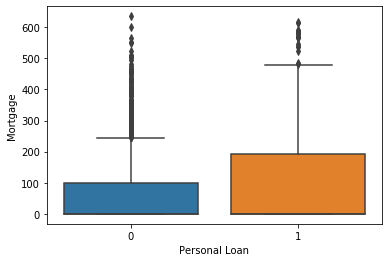

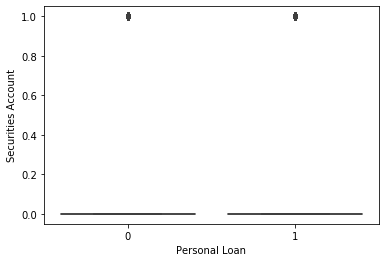

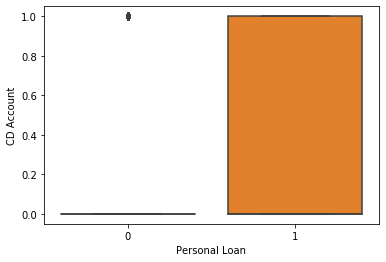

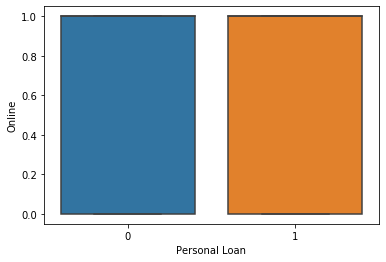

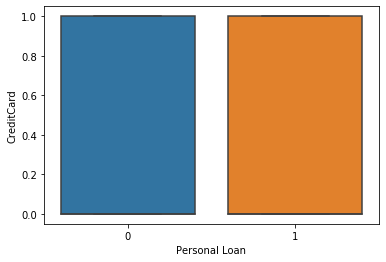

In [24]:

xaxis=['Age','Experience','Income','Family','CCAvg','Education_Advanced', 'Education_Graduate','Education_Undergrad','Mortgage','Securities Account','CD Account','Online','CreditCard']
for i in xaxis:
    plt.figure(i)
    sns.boxplot(x='Personal Loan', y=i, data=bank)

In [25]:
banktosplit = bank.drop(['ID', 'ZIP Code', 'Education_Advanced'],axis=1)

In [26]:

X = banktosplit.drop('Personal Loan',axis=1)
Y = banktosplit['Personal Loan']   

#Split the data into training and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad
1334,47,22,35,2,1.3,0,0,0,1,0,0,1
4768,38,14,39,1,2.0,0,0,0,1,0,1,0
65,59,35,131,1,3.8,0,0,0,1,1,0,1
177,29,3,65,4,1.8,244,0,0,0,0,1,0
4489,39,13,21,3,0.2,0,0,0,1,0,1,0


In [27]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.263906  0.265356  0.053725  0.574127  0.193721  0.000919 -0.834411   

          7        8         9        10        11  intercept  
0  3.156083 -0.58496 -0.873657 -0.134523 -3.713187   -1.81592  


In [28]:
#number of customers  buying the personal loan
(y_predict == 1).sum()

104

In [29]:
model_score1 = model.score(x_train, y_train)
print("training accuracy",model_score1)
print("model accuracy", metrics.accuracy_score(y_test, y_predict))
print("recall",metrics.recall_score(y_test, y_predict))
print("precision",metrics.precision_score(y_test, y_predict))
print("F1 Score",metrics.f1_score(y_test, y_predict))
print("AUC",metrics.roc_auc_score(y_test, y_predict))


training accuracy 0.9571428571428572
model accuracy 0.958
recall 0.6375838926174496
precision 0.9134615384615384
F1 Score 0.7509881422924901
AUC 0.8154610802835582


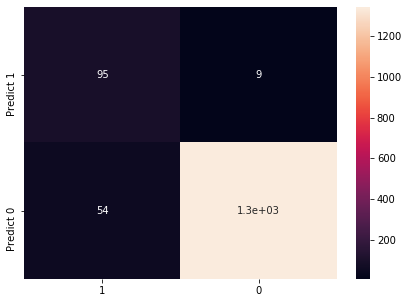

In [30]:
cm=metrics.confusion_matrix(y_predict, y_test, labels=[1,0])

df_cm = pd.DataFrame(cm, columns = [i for i in ["1","0"]],
                   index = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they bought the personal loan 95

True Negatives (TN): we correctly predicted that they didnt buy the personal loan is 1342

False Positives (FP): we incorrectly predicted that they bought the personal loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they  didnt buy the personal loan (a "Type II error") 54 Falsely predict negative Type II error

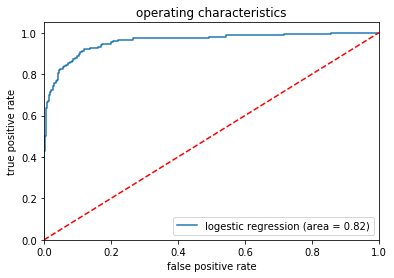

In [31]:
model_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fpr, tpr, threshoulds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logestic regression (area = %0.2f)' % model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('operating characteristics')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')


In [32]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.64      0.75       149

    accuracy                           0.96      1500
   macro avg       0.94      0.82      0.86      1500
weighted avg       0.96      0.96      0.95      1500




Give your reasoning on how can the model perform better?

>1> We had to do an imputation to correct for invalid entries like what was found in the Experience columns > this can be avoided by making sure that the data entered correctly in the first place.

>2> It is noticeable that majority of data has value of 0 for Personal Loan (around 90% of it), which is our dependent variable. This skew in the data distribution will affect our model training as noticed by the Recall being only 64% and the F1 Score. a well distributed data will give us a better model if used.

>3> It is noticeable that the major contributor in the model formation is the Securities Account and CD Account attributes. other attributes included in the model design as they are still logically important like Age and family size.






Give Business understanding of your model?

>This model can give us accurate results of around (95%). but the recall being low (64%) makes the module likly to miss cutomers that might get the loan. However, the precision is (91%) extremely high, which means that most of the customers that get identified by the module will accept the loan.


>AUC is around 81% which give our model a good evaluation which might help in further application to be used for future targeted campaigns for loan advertisement. keeping in mind having low recall (64%) might lead to missing major portion of people who might accept the loan as they are not included in the campaign based on this model


